In [1]:
#Author:Vineeth Govind

import pandas as pd, numpy as np
from sklearn import preprocessing
from sklearn.metrics import accuracy_score, classification_report
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
import itertools
#load data into a dataframe 
data=pd.read_csv("loan.csv")
# print  various stats
print(data.head())
print(data.describe())

   ID  Age  Experience  Income  ZIP Code  Family  CCAvg  Education  Mortgage  \
0   1   25           1      49     91107       4    1.6          1         0   
1   2   45          19      34     90089       3    1.5          1         0   
2   3   39          15      11     94720       1    1.0          1         0   
3   4   35           9     100     94112       1    2.7          2         0   
4   5   35           8      45     91330       4    1.0          2         0   

   Personal Loan  Securities Account  CD Account  Online  CreditCard  
0              0                   1           0       0           0  
1              0                   1           0       0           0  
2              0                   0           0       0           0  
3              0                   0           0       0           0  
4              0                   0           0       0           1  
                ID          Age   Experience       Income      ZIP Code  \
count  5000.000000

C:\Anaconda\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


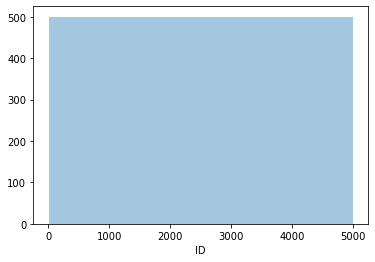

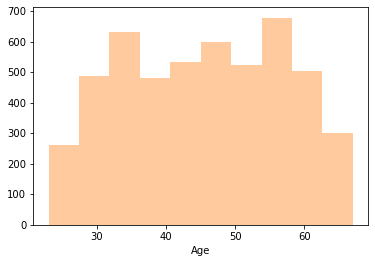

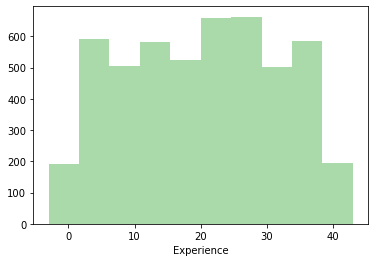

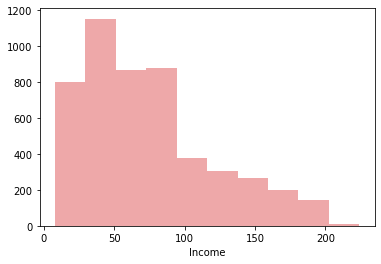

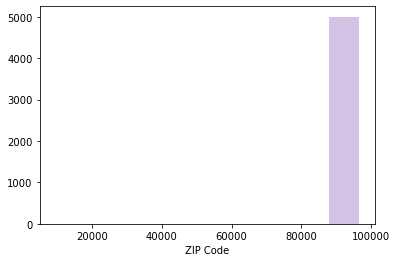

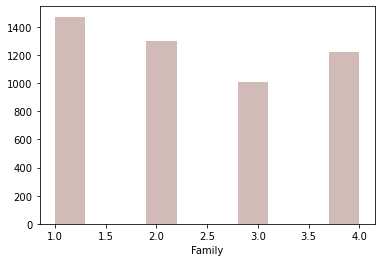

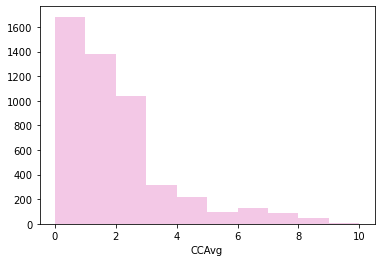

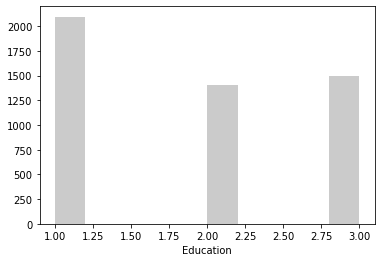

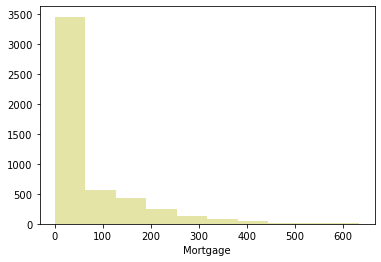

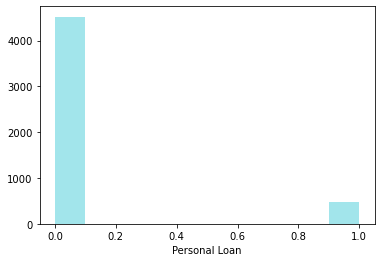

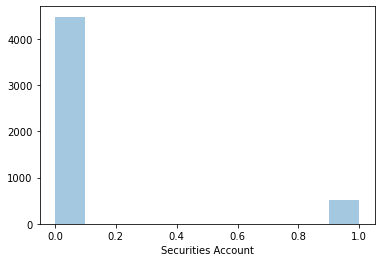

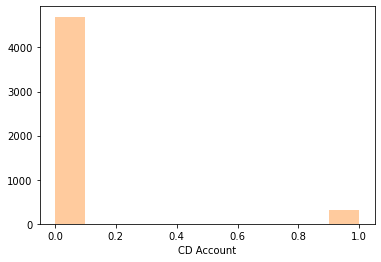

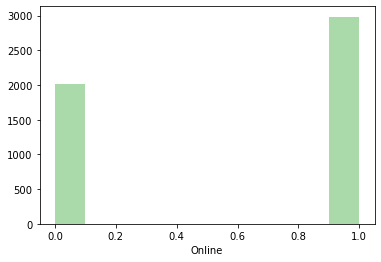

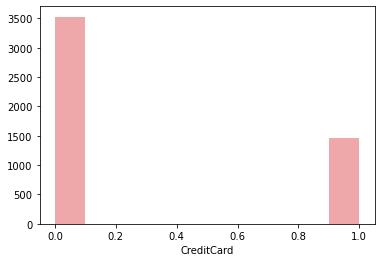

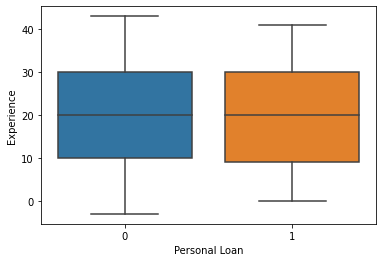

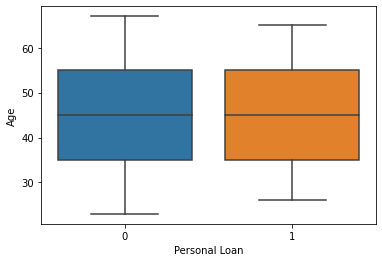

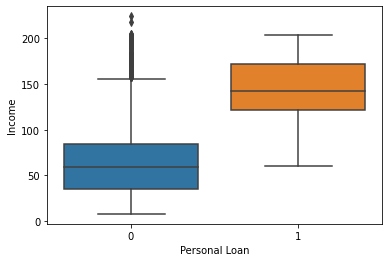

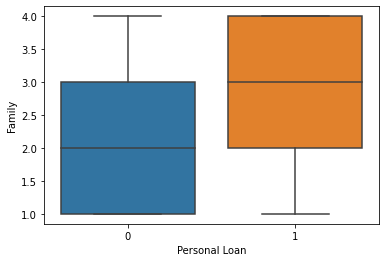

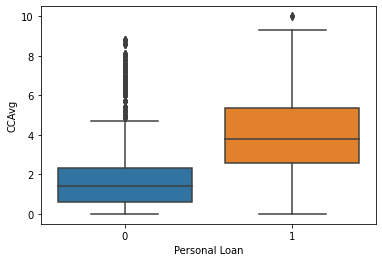

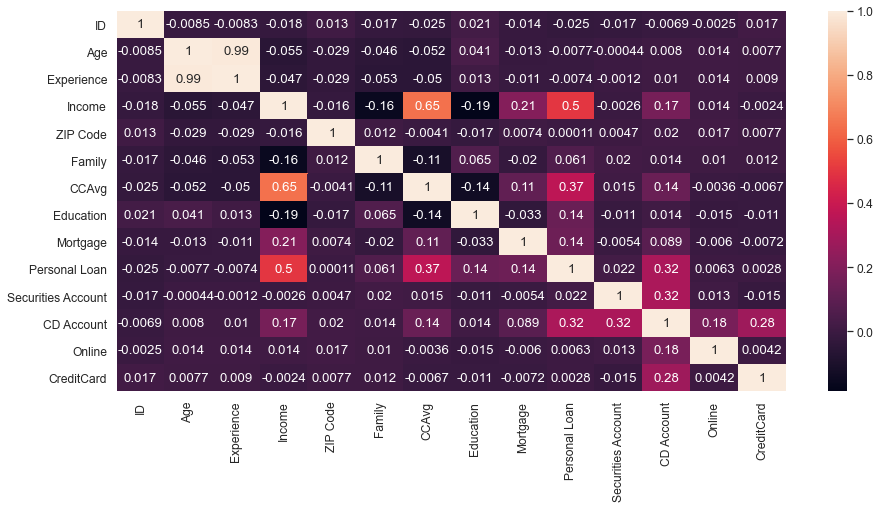

In [3]:
#1)Univariate analysis
#used to cycle through different colors in the plot loop
palette = itertools.cycle(sns.color_palette())

#Histogram using a loop to plot all all columns for univariate analysis
# Instead of using sns.distplot(data[Column], kde=False, color='green', bins=10) for each column
#used to cycle through different colors in the plot loop
palette = itertools.cycle(sns.color_palette())
for i, col in enumerate(data.columns):
    plt.figure(i)
    sns.distplot(data[col],kde=False,color=next(palette),bins=10)
plt.show()

#bivariate analysis of various attributes on personal loan
sns.boxplot(x='Personal Loan', y='Experience', data= data)
plt.show()
sns.boxplot(x='Personal Loan', y='Age', data= data)
plt.show()
sns.boxplot(x='Personal Loan', y='Income', data= data)
plt.show()
sns.boxplot(x='Personal Loan', y='Family', data= data)
plt.show()
sns.boxplot(x='Personal Loan', y='CCAvg', data= data)
plt.show()

#Multivariate analysis using pairplot
#sns.pairplot(data=data)
#plt.show()

#2)Multivariate Analysis 

plt.figure(figsize=(15,7))
sns.set(font_scale=1.1)
sns.heatmap(data.corr(),annot=True)
plt.show()

In [4]:
#drop the id column
data=data.drop(['ID'], axis = 1) 

#3)ANALYSIS OF COLUMN DISTRIBUTION

#1)ID: This attribute can be dropped as it is a categorical variable that doesnt affect the data or can be used to build model.
#2)Age:3 values are slightly higher than the rest but other than that the data is quite evenly distributed
#3)Experience:Other than 4 peaks the data has a guassian distribution 
#4)Income:it is highly skewed to the left showing the there far more cusomers are  of lower income level
#5)ZIP Code: The attribute has sharp peaks telling that either data there are most customers from a particular location or data is collected more from a particular location.
#6)Family: Families with 1 child make up for the majority of customers and  families3 children make up for least number of #customers.Since most of the peak dont vary much from each other data is  quite evenly distributed
#7)CCavg:This attribute has the maximum number of outliers as seen from the left skewness.Most people dont spend much using credit #cards
#8)Eduction : Mean and median are almost equal. Data follows a normal distribution. 
#9)Mortage: This attribute is highly left skewed with a very high peak on the left .this column has the 2nd most outliers.Most # # #people  have low or no mortages
#10)Personal loan:only a few customers have personal loan
#11)Securities Account : This attributes tells us that most customers donot have securities account.
#12)CD account: Most of the customers dont have CDaccounts.
#13)Online: Majority of customers use online banking .Though the number of customers who dont use online banking is not low
#14)Credit Card: Only a few customers use Credit card.


#4)checking for missing values and outliers

print('Number of missing values are', data.isnull().sum())

Number of missing values are Age                   0
Experience            0
Income                0
ZIP Code              0
Family                0
CCAvg                 0
Education             0
Mortgage              0
Personal Loan         0
Securities Account    0
CD Account            0
Online                0
CreditCard            0
dtype: int64


In [5]:
#No missing values are found
#dealing with outliers
#function to determine outliers using z score
outliers=[]
def detect_outlier(data_1):
    
    threshold=3
    mean_1 = np.mean(data_1)
    std_1 =np.std(data_1)
    
    
    for y in data_1:
        z_score= (y - mean_1)/std_1 
        if np.abs(z_score) > threshold:
            outliers.append(y)
    return outliers


Age_datapoints = detect_outlier(data.Age)
print('Age outliers are:',Age_datapoints)
Age_datapoints.clear()

Experience_datapoints = detect_outlier(data.Experience)
print('Experience outliers are:',Experience_datapoints)
Age_datapoints.clear()

Income_datapoints = detect_outlier(data.Income)
print('Income outliers are:',Income_datapoints)
Income_datapoints.clear()

education_datapoints = detect_outlier(data.Education)
print('Education outliers are:',education_datapoints)
education_datapoints.clear()

family_datapoints = detect_outlier(data.Family)
print('Family outliers are:',family_datapoints)
family_datapoints.clear()

CCAvg_datapoints = detect_outlier(data.CCAvg)
print('CCAvg outliers are:',CCAvg_datapoints)
#sort the outliers dataframe to find the lowest value and use it to remove all outliers in the dataframe
CCAvg_datapoints.sort()
print('Minimum CCAvg outlier value:',CCAvg_datapoints[:1])
CCAvg_datapoints.clear()

mortgage_datapoints = detect_outlier(data.Mortgage)
print('Mortgage outliers are:',mortgage_datapoints)
mortgage_datapoints.sort()
print('Minimum Mortgag outlier value:',mortgage_datapoints[:1])

Age outliers are: []
Experience outliers are: []
Income outliers are: [224, 218]
Education outliers are: []
Family outliers are: []
CCAvg outliers are: [8.9, 8.1, 8.0, 7.2, 7.4, 7.5, 7.8, 7.9, 7.4, 7.5, 7.9, 7.5, 7.3, 7.5, 7.5, 8.3, 8.0, 7.8, 7.2, 7.2, 8.6, 7.8, 7.6, 7.4, 8.1, 7.6, 7.6, 10.0, 8.1, 8.8, 8.1, 8.8, 7.6, 7.3, 7.4, 7.8, 8.0, 8.0, 8.8, 8.1, 9.0, 8.6, 7.4, 7.3, 7.4, 7.4, 7.6, 7.4, 7.2, 8.6, 8.3, 7.8, 7.4, 8.1, 7.3, 8.5, 8.0, 7.3, 8.0, 10.0, 7.3, 8.0, 10.0, 7.5, 7.5, 8.0, 8.8, 7.4, 7.3, 7.8, 7.4, 7.9, 7.5, 7.2, 8.0, 7.2, 8.8, 7.9, 7.6, 8.2, 7.3, 8.1, 7.5, 7.8, 8.6, 8.8, 8.0, 7.5, 8.8, 7.8, 7.2, 8.6, 8.0, 7.4, 8.1, 8.1, 8.8, 7.8, 9.0, 7.2, 9.3, 7.5, 7.6, 7.2, 8.6, 8.8, 7.6, 7.6, 7.2, 7.3, 7.2, 7.4, 8.1, 7.3, 8.5, 8.6, 8.0, 7.2, 7.2, 7.5, 8.6]
Minimum CCAvg outlier value: [7.2]
Mortgage outliers are: [412, 455, 366, 391, 617, 402, 392, 419, 466, 458, 547, 470, 378, 485, 364, 449, 587, 372, 524, 366, 442, 394, 475, 437, 428, 366, 382, 397, 380, 433, 483, 455, 421, 565, 394, 601, 

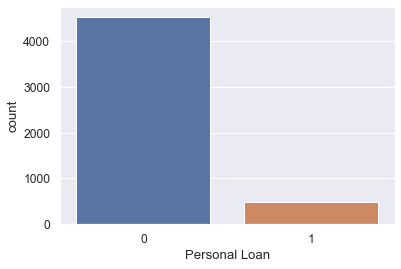

 Personal loans count 0    4520
1     480
Name: Personal Loan, dtype: int64
Personal Loans distribution                      Age  Experience      Income      ZIP Code    Family  \
Personal Loan                                                              
0              45.367257   20.132301   66.171903  93152.428761  2.373451   
1              45.066667   19.843750  144.745833  93153.202083  2.612500   

                  CCAvg  Education   Mortgage  Securities Account  CD Account  \
Personal Loan                                                                   
0              1.614681   1.843584  46.905752            0.102212    0.035841   
1              3.478796   2.233333  60.235417            0.125000    0.291667   

                 Online  CreditCard  
Personal Loan                        
0              0.595796    0.293584  
1              0.606250    0.297917  
Data values stored by the DataFrame:
[[25.  1. 49. ...  0.  0.  0.]
 [45. 19. 34. ...  0.  0.  0.]
 [39. 15. 11. .

In [6]:
CCAvg_datapoints.clear()
#Replacing outliers with mean values
data['Income'].values[data['Income'].values>=218]=data.Income.mean()
data['CCAvg'].values[data['CCAvg'].values>=7.2]=data.CCAvg.mean()
data['Mortgage'].values[data['Mortgage'].values>=364]=data.Mortgage.mean()

#5) Target column distribution
sns.countplot(x= "Personal Loan",data=data)
plt.show()
 
print(' Personal loans count',data["Personal Loan"].value_counts())

#6)Personal loan distribution

print('Personal Loans distribution',data.groupby(data['Personal Loan']).mean() )

print("Data values stored by the DataFrame:");
print(data.values);
rowIndex = data.index;
colIndex = data.columns;
print("Row Index:");
print(rowIndex);
#6)column description
print("Column Index:");
print(colIndex);

#7)check dataframe attributes
print("data type of various columns are :", data.dtypes)
print("info about dataframe  :", data.info)


print(data)

In [7]:
#rearranging columns to make "Personal Loan"last column
dt = data

y= dt['Personal Loan']
dt.drop(['Personal Loan'], axis = 1,inplace = True)
data['Personal Loan'] = y

#8)splitting data

from sklearn.model_selection import train_test_split
X=data.iloc[:,0:11]
y=data.iloc[:,11]
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.30,random_state=0)

#9)logistic regression and feature scaling the train and test set using normalizer scalar

from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import Normalizer


scaler = preprocessing. Normalizer()
X_train_std= scaler.fit_transform(X_train)
X_test_std= scaler.fit_transform(X_test)
logreg = LogisticRegression()
logreg.fit(X_train_std,y_train)
y_pred_lr=logreg.predict(X_test_std)
#calculating model performance using confusion matrix

from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn import metrics
cnf_matrix= confusion_matrix(y_test,y_pred_lr)
accu_score= accuracy_score(y_test,y_pred_lr)
class_report=classification_report(y_test,y_pred_lr)

print("confusion_matrix of logistic regression is",cnf_matrix)
print("accuracy score of logistic regression is",accu_score)
print("classification report of logistic regression  is")
print (class_report)

confusion_matrix of logistic regression is [[1055    0]
 [ 445    0]]
accuracy score of logistic regression is 0.7033333333333334
classification report of logistic regression  is
              precision    recall  f1-score   support

           0       0.70      1.00      0.83      1055
           1       0.00      0.00      0.00       445

    accuracy                           0.70      1500
   macro avg       0.35      0.50      0.41      1500
weighted avg       0.49      0.70      0.58      1500



C:\Anaconda\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


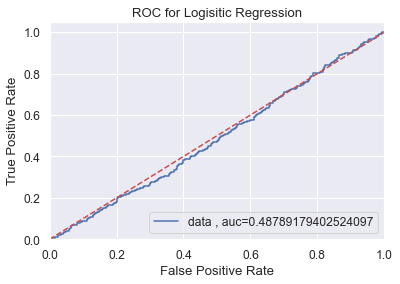

C:\Anaconda\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\Anaconda\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\Anaconda\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\Anaconda\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\Anaconda\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was re

C:\Anaconda\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\Anaconda\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\Anaconda\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\Anaconda\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\Anaconda\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was re

best params lr {'C': 0.1, 'penalty': 'l1', 'solver': 'liblinear'}


In [8]:
#10)ROC curve,fpr and tpr calculation

from sklearn.metrics import roc_curve,roc_auc_score

y_pred_prob_lr=logreg.predict_proba(X_test_std)[::,1]
#y_pred_prob_enc= lab_enc.fit_transform(y_pred_prob)
fpr_lr,tpr_lr,thresholds =metrics.roc_curve(y_test,y_pred_prob_lr)
auc=metrics.roc_auc_score(y_test,y_pred_prob_lr)
plt.plot(fpr_lr,tpr_lr,label="data , auc="+str(auc))
plt.legend(loc=4)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC for Logisitic Regression')
plt.show()

#11)Hyperparameterfor logisitc regression using tuning using grid space

from sklearn.model_selection import GridSearchCV

logreg=LogisticRegression()
grid={"C":np.logspace(-2,0,3), "penalty":["l1","l2"],"solver":['liblinear','saga','lbfgs','sag']}
clf = GridSearchCV(logreg,param_grid=grid,cv=5, verbose=0)
best_model = clf.fit(X, y)

# print best hyperparameters

print('best params lr',best_model.best_params_)

In [9]:
#logistic regression using tuned hyperparameters from gridsearch
logreg_grid = LogisticRegression(C=0.1,penalty='l1',solver='liblinear')
logreg_grid.fit(X_train_std,y_train)
y_pred_lr_grid=logreg_grid.predict(X_test_std)
#calculating model performance using confusion matrix

from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn import metrics
cnf_matrix_lg_grid= confusion_matrix(y_test,y_pred_lr_grid)
accu_score_lg_grid= accuracy_score(y_test,y_pred_lr_grid)
class_report_lg_grid=classification_report(y_test,y_pred_lr_grid)

#12)Print Best accuracy and Best Parameters using Confusion Matrix & Print Classification Report to check precision,recall&F1 Score

print("confusion_matrix of logistic regression with hypertuned parameters is",cnf_matrix_lg_grid)
print("accuracy score of logistic regression  with hypertuned parameters is",accu_score_lg_grid)
print("classification report of logistic regression  with hypertuned parameters is")
print (class_report_lg_grid)

confusion_matrix of logistic regression with hypertuned parameters is [[1055    0]
 [ 445    0]]
accuracy score of logistic regression  with hypertuned parameters is 0.7033333333333334
classification report of logistic regression  with hypertuned parameters is
              precision    recall  f1-score   support

           0       0.70      1.00      0.83      1055
           1       0.00      0.00      0.00       445

    accuracy                           0.70      1500
   macro avg       0.35      0.50      0.41      1500
weighted avg       0.49      0.70      0.58      1500



C:\Anaconda\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [10]:
#13)K-neighbors classifier and why the algorithm
# To evaluate a classifier we generally look at 3 parameters 1) Ease to interpret output 2. Calculation time 3. Predictive Power
# KNN algorithm fairs across all parameters of considerations. It is commonly used for its easy of interpretation and low calculation time.

from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
knn.fit(X_train_std, y_train)
y_pred_knn = knn.predict(X_test_std)



#14) KNN hyperparameter tuning  using gridsearch

knn2= KNeighborsClassifier()
grid_params= {'n_neighbors':np.arange(1,30),'weights':['uniform','distance'],'metric':['euclidean','manhantann','minkowski','cosine','hamming','mahalanobis']}
gs= GridSearchCV(knn2,grid_params,verbose=0,cv=5,n_jobs=-1)
gs_knn=gs.fit(X_train_std,y_train) 
#print best parameters

print('best params knn', gs_knn.best_params_) 
#Hypertuning using Gridsearch gave the following best parameters neighbors=5,metric=minkowski and weight=uniform.refitting the model using those parameters

best params knn {'metric': 'hamming', 'n_neighbors': 4, 'weights': 'uniform'}


In [11]:
#15)Rebuilding knn using hyperparameter values 

knn_best = KNeighborsClassifier(n_neighbors=4, metric='hamming',weights='uniform')
knn_best.fit(X_train_std, y_train)
y_pred_knn_best = knn.predict(X_test_std)

#16)print confusion matrix,classification report,ROC  curve

cnf_matrix_knn= confusion_matrix(y_test,y_pred_knn_best)
accu_score_knn= accuracy_score(y_test,y_pred_knn_best)
class_report_knn=classification_report(y_test,y_pred_knn_best)
print("confusion_matrix of kneighbors is ",cnf_matrix_knn)
print("accuracy score of kneighbors is",accu_score_knn)
print("classification report of kneighbors  is")
print (class_report_knn)

confusion_matrix of kneighbors is  [[872 183]
 [373  72]]
accuracy score of kneighbors is 0.6293333333333333
classification report of kneighbors  is
              precision    recall  f1-score   support

           0       0.70      0.83      0.76      1055
           1       0.28      0.16      0.21       445

    accuracy                           0.63      1500
   macro avg       0.49      0.49      0.48      1500
weighted avg       0.58      0.63      0.59      1500



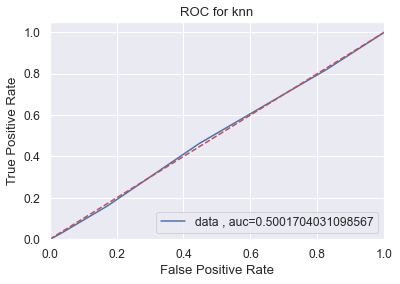

[0 0 0 ... 0 0 0]


In [12]:
y_pred_prob_knn=knn.predict_proba(X_test_std)[::,1]
fpr_knn,tpr_knn,thresholds =metrics.roc_curve(y_test,y_pred_prob_knn)
auc=metrics.roc_auc_score(y_test,y_pred_prob_knn)
plt.plot(fpr_knn,tpr_knn,label="data , auc="+str(auc))
plt.legend(loc=4)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC for knn')
plt.show()

#17)Naive Bayes Bayes classifier and why the algorithm
#It is easy and fast to predict class of test data set. When assumption of independence holds, a Naive Bayes classifier performs better compare to other models like logistic regression and you need less training data.
from sklearn.naive_bayes import GaussianNB
nb = GaussianNB()
nb.fit(X_train_std, y_train)
y_pred_nb = nb.predict(X_test_std)
print(y_pred_nb)

In [13]:
#18) confusion matrix,classification report
cnf_matrix_nb= confusion_matrix(y_test,y_pred_nb)
accu_score_nb= accuracy_score(y_test,y_pred_nb)
class_report_nb=classification_report(y_test,y_pred_nb)
print("confusion_matrix of Naive bayes is",cnf_matrix_nb)
print("accuracy score of Naive bayes is",accu_score_nb)
print("classification report of Naive bayes  is")
print (class_report_nb)
#Naive Bayes classifier has precision of 0.74,accuracy of 0.74 and f1 score of 0.84

#19)#printing classification report for all 3 models and insights
print("classification report of logistic regression  with hypertuned parameters is")
print (class_report_lg_grid)
print("classification report of kneighbors  is")
print (class_report_knn)
print("classification report of Naive bayes  is")
print (class_report_nb)

confusion_matrix of Naive bayes is [[1043   12]
 [ 373   72]]
accuracy score of Naive bayes is 0.7433333333333333
classification report of Naive bayes  is
              precision    recall  f1-score   support

           0       0.74      0.99      0.84      1055
           1       0.86      0.16      0.27       445

    accuracy                           0.74      1500
   macro avg       0.80      0.58      0.56      1500
weighted avg       0.77      0.74      0.67      1500

classification report of logistic regression  with hypertuned parameters is
              precision    recall  f1-score   support

           0       0.70      1.00      0.83      1055
           1       0.00      0.00      0.00       445

    accuracy                           0.70      1500
   macro avg       0.35      0.50      0.41      1500
weighted avg       0.49      0.70      0.58      1500

classification report of kneighbors  is
              precision    recall  f1-score   support

           0       0

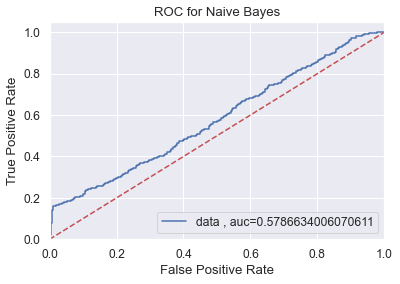

In [14]:
#EVALUATION WITH INSIGHTS
#Bayes Naive has the  best f1 score of 0.84 and the best accuracy of 0.74 making it the best classifier for this  model.Kneighbors #regression has the worst accuracy and f1 score.

#20)ROC curve,fpr,tpr for Naive Bayes & the difference among all the models used in  analysis

y_pred_prob_nb=nb.predict_proba(X_test_std)[::,1]
#y_pred_prob_enc= lab_enc.fit_transform(y_pred_prob)
fpr_nb,tpr_nb,thresholds =metrics.roc_curve(y_test,y_pred_prob_nb)
auc=metrics.roc_auc_score(y_test,y_pred_prob_nb)
plt.plot(fpr_nb,tpr_nb,label="data , auc="+str(auc))
plt.legend(loc=4)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC for Naive Bayes')
plt.show()

In [15]:
 #ROC CURVE EVALUATION OF ALL MODELS
#The area under the ROC curve(AUC) is highest for naives bayes classifier indicating that it is the best amongst the 3 classifiers

#21)Discussion of some of the key hyper parameters available for the selected algorithm.
#Naive bayes(GuassianNB) has 2 Hyper parameters that are listed below 
#1) priors:Prior probabilities of the classes. If specified the priors are not adjusted according to the data.
#2)var_smoothing:Portion of the largest variance of all features that is added to variances for calculation stability.
#Priors has a default value of "none" and var_smoothing has a default value of 1e-09 both of which were used in the naive bayes model
#The default hyperparameters for knn are n_neighbors=5,weights=unfirm,metric=minkowski which turned out to be best hyperparamters from gridsearch
#The default hyperparameters for logistic regression are solver=liblinear,penalty=l1 which turned out to be best hyperparamters from gridsearch

#22)Regularization techniques used for the model
#Lasso regression regularisation technique  is used in the logistic regression hyperparameter tuning using gridsearch.Lasso, Ridge regression  were given as penalty options for the Gridsearchcv penalty attribute.Gridsearchcv chose lasso regression as the best penalty(regularization)hyperparameter

#23)range estimate at 95% confidence
import scipy.stats
from scipy.stats import sem, t
from scipy import mean
confidence=0.95
a = 1.0 * np.array(data)
n = len(a)
m, se = np.mean(a), scipy.stats.sem(a)
h = se * scipy.stats.t.ppf((1 + confidence) / 2., n-1)
print("Confidence range is:",m-h,m,m+h)

Confidence range is: [7180.22595816 7180.22582541 7179.27011273 7121.71586707 7180.51195329
 7180.50299345 7180.52048681 7178.2433751  7180.53529351 7180.53716657
 7180.53017052 7180.53113955 7180.53560371] 7180.543772007662 [7180.86158586 7180.86171861 7181.81743128 7239.37167694 7180.57559072
 7180.58455057 7180.5670572  7182.84416891 7180.55225051 7180.55037745
 7180.55737349 7180.55640446 7180.5519403 ]
